# Introducción 

# Objetivos 

El objetivo general de la prueba `recommender_system_test` es evaluar el impacto de un sistema de recomendaciones mejorado en el comportamiento de los usuarios en términos de conversión a través del embudo de pago. La prueba involucra dos grupos: el grupo de control (A) y el grupo experimental con el nuevo embudo de pago (B). La prueba se lanzó el 7 de diciembre de 2020, dejó de aceptar nuevos usuarios el 21 de diciembre de 2020 y finalizó el 1 de enero de 2021. La audiencia de la prueba consiste en el 15% de los nuevos usuarios de la región de la UE, con un número previsto de 6,000 participantes. El propósito de la prueba es medir si, dentro de los 14 días posteriores a la inscripción, los usuarios muestran una mejor conversión en vistas de la página del producto (`product_page`), en la acción de agregar artículos al carrito de compras (`product_cart`) y en las compras (`purchase`). Se espera que en cada etapa del embudo (`product_page → product_cart → purchase`), haya al menos un aumento del 10%. Los datos de la prueba deben descargarse, comprobarse para asegurar que la prueba se realizó correctamente, y analizarse para evaluar los resultados obtenidos.


# Descomposición de la tarea

* ...

# Carga de librerías 

In [39]:
# Carga de librerías 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import graph_objects as go

# Carga de datos

In [40]:
# Carga de datasets desde carpeta local
data_path = os.path.join("..", "datasets")

dataset1_path = os.path.join(data_path, "ab_project_marketing_events_us.csv")
dataset2_path = os.path.join(data_path, "final_ab_events_upd_us.csv")
dataset3_path = os.path.join(data_path, "final_ab_new_users_upd_us.csv")
dataset4_path = os.path.join(data_path, "final_ab_participants_upd_us.csv")

# el calendario de eventos de marketing para 2020
ab_project_marketing_data = pd.read_csv(dataset1_path)

# todos los usuarios que se registraron en línea desde 7 al 21 de diciembre
final_ab_new_events_data = pd.read_csv(dataset3_path)

# todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
final_ab_events_data = pd.read_csv(dataset2_path)

# tabla con los datos de los participantes de la prueba
final_ab_participants_data = pd.read_csv(dataset4_path)

In [41]:
# Carga de datos en jupyter de platforma

"""ab_project_marketing_data = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
final_ab_events_data = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
final_ab_new_events_data = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
final_ab_participants_data = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")"""

'ab_project_marketing_data = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")\nfinal_ab_events_data = pd.read_csv("/datasets/final_ab_events_upd_us.csv")\nfinal_ab_new_events_data = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")\nfinal_ab_participants_data = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")'

## Exploración inicial de datos

### Revisión de dataset ab_project_marketing_data

In [42]:
# Revisión de datos ab_project_data
print('- Información sobre dataset -')
print(ab_project_marketing_data.head(5))
print()
print(ab_project_marketing_data.info())
print()
print('- Datos ausentes -')
print(ab_project_marketing_data.isna().sum())
print()
print('- Valores duplicados -')
print(ab_project_marketing_data.duplicated().sum())

- Información sobre dataset -
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None

- Datos ausentes -
name         0
regions      

- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña

In [43]:
# Cambio de formato de columna start_dt
ab_project_marketing_data['start_dt'] = pd.to_datetime(ab_project_marketing_data['start_dt'])
ab_project_marketing_data['finish_dt'] = pd.to_datetime(ab_project_marketing_data['finish_dt'])

### Revisión de dataset final_ab_events_data

In [44]:
# Revisión de dataset final_ab_events_data
print('- Información sobre dataset -')
print(final_ab_events_data.head())
print()
print(final_ab_events_data.info())
print()
print('- Datos ausentes -')
print(final_ab_events_data.isna().sum())
print()
print('- Valores duplicados -')
print(final_ab_events_data.duplicated().sum())

- Información sobre dataset -
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None

- Datos ausentes -
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

- Valores duplicados -
0


- `user_id`
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

In [45]:
# Cambio de formato de columna event_date
final_ab_events_data['event_dt'] = pd.to_datetime(final_ab_events_data['event_dt'])
final_ab_events_data['date'] = final_ab_events_data['event_dt'].dt.date

In [46]:
# Revisión de datos en la columna 'details'
final_ab_events_data['details'].sample(10)

49554     4.99
16270     9.99
155026     NaN
226707     NaN
301366     NaN
172112     NaN
384999     NaN
99619      NaN
416905     NaN
218229     NaN
Name: details, dtype: float64

In [47]:
# Revisión de datos que contienen 'NaN' en la columna 'details'
no_purchase = final_ab_events_data[final_ab_events_data['details'].isna()]
no_purchase.sample(10)

# Se aplica reemplazo de valores NaN por 0 
final_ab_events_data.fillna({'details':0}, inplace = True)
print(final_ab_events_data.sample(10))

                 user_id            event_dt    event_name  details  \
386074  F2456F3BE271E763 2020-12-23 14:26:55         login     0.00   
208518  A7A055BA12053CBA 2020-12-22 16:52:48  product_page     0.00   
70763   78EE288B04ABFB55 2020-12-12 23:55:33  product_cart     0.00   
174103  FEAB9E70889386CC 2020-12-17 09:49:20  product_page     0.00   
84677   7CA4C8136824B06B 2020-12-16 13:25:04  product_cart     0.00   
16387   A2C8EF97989388E7 2020-12-14 00:23:31      purchase     4.99   
399633  DA905726EE641062 2020-12-24 14:00:37         login     0.00   
128314  5B1F39B5D751B669 2020-12-09 19:16:43  product_page     0.00   
11013   CEBFAAC39328E3F8 2020-12-12 23:35:07      purchase     4.99   
334756  7AE6ABF31873EE38 2020-12-18 22:58:48         login     0.00   

              date  
386074  2020-12-23  
208518  2020-12-22  
70763   2020-12-12  
174103  2020-12-17  
84677   2020-12-16  
16387   2020-12-14  
399633  2020-12-24  
128314  2020-12-09  
11013   2020-12-12  
334756  

In [48]:
# Verificación de los valores de eventos
final_ab_events_data['event_name'].value_counts()

event_name
login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: count, dtype: int64

Columna 'details' contiene información numérica y NaN, la documentación del dataset indica que tiene la cantidad en USD para cuando el evento es 'purchase'. Se infiere que los datos NaN son 0, ya que no representan una transacción concretada. 
Se observa que hay más valores de `purchase` que de `product_cart`, lo que puede sugerir que se evita esta última etapa y se puede comprar con algo parecido a un botón 'compra rápida'

### Revisión de dataset final_ab_new_events_data

In [49]:
# Revisión de datos en dataset final_ab_new_events_data
print('- Información sobre dataset -')
print(final_ab_new_events_data.sample(10))
print()
print(final_ab_new_events_data.info())
print()
print('- Datos ausentes -')
print(final_ab_new_events_data.isna().sum())
print()
print('- Valores duplicados -')
print(final_ab_new_events_data.duplicated().sum())

- Información sobre dataset -
                user_id  first_date     region   device
2013   2B2A80BDED7F8A2A  2020-12-07  N.America  Android
13724  E88883CDEF8783D6  2020-12-21         EU      Mac
39990  8908775C096835D2  2020-12-11        CIS  Android
29987  846969756B92579B  2020-12-23       APAC      Mac
54322  D651236BB407D94A  2020-12-13         EU  Android
40531  841E2E33E758760F  2020-12-18         EU       PC
18766  F62AAB9BE7003A97  2020-12-08         EU  Android
46565  2E92C793C6EF61CB  2020-12-12         EU  Android
54162  98633D4B47C65348  2020-12-13         EU  Android
49633  0D167A38AD99B258  2020-12-19       APAC  Android

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtype

0


- `user_id`
- `first_date`: fecha de inscripción
- `region`
- `device`: dispositivo utilizado para la inscripción

In [50]:
# Se cambia el formato de la columna 'first_date' 
final_ab_new_events_data['first_date'] = pd.to_datetime(final_ab_new_events_data['first_date'])


No contiene datos nulos y el único cambio realizado fue el formato de fecha en la columna 'first_date'

### Revisión del dataset final_ab_participants_data

In [51]:
# Revisión del dataset 

print('- Información sobre dataset -')
print(final_ab_participants_data.head())
print()
print(final_ab_participants_data.info())
print()
print('- Datos ausentes -')
print(final_ab_participants_data.isna().sum())
print()
print('- Valores duplicados -')
print(final_ab_participants_data.duplicated().sum())

- Información sobre dataset -
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

- Datos ausentes -
user_id    0
group      0
ab_test    0
dtype: int64

- Valores duplicados -
0


- `user_id`
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario

# Procesamiento y análisis de datasets

## Procesamiento y análisis del dataset ab_project_marketing_data

In [52]:
# Fechas donde salieron promociones 

ab_project_marketing_data['month'] = ab_project_marketing_data['start_dt'].dt.month


mkt_groupby_date = ab_project_marketing_data.groupby(['month','name']).count().reset_index()
mkt_groupby_date[['month','name']].sort_values(by='month')

,month,name
0,1,Chinese New Year Promo
1,2,St. Valentine's Day Giveaway
2,3,International Women's Day Promo
3,3,St. Patric's Day Promo
4,4,Easter Promo
5,5,Labor day (May 1st) Ads Campaign
6,5,Victory Day CIS (May 9th) Event
7,6,Dragon Boat Festival Giveaway
8,7,4th of July Promo
9,10,Chinese Moon Festival


Se desplegaron diferentes campañas en los meses; en algunos meses solo se desplego una campamañana de marketing, mientras que otras meses, hasta dos camapañas se mostraron a los usuarios. 

In [53]:
# Duración en días de cada campaña en días 

ab_project_marketing_data['duration'] = (ab_project_marketing_data['finish_dt'] - ab_project_marketing_data['start_dt']).dt.days

ab_project_marketing_data['duration'].describe()

count    14.000000
mean      5.142857
std       3.505098
min       1.000000
25%       2.000000
50%       5.500000
75%       7.000000
max      13.000000
Name: duration, dtype: float64

La duración media de las campañas fue de 5 días, con una duración mínima de 1 y máxima de 13 días. El 75% de las campañas tienen una duración máxima de 7 días. 

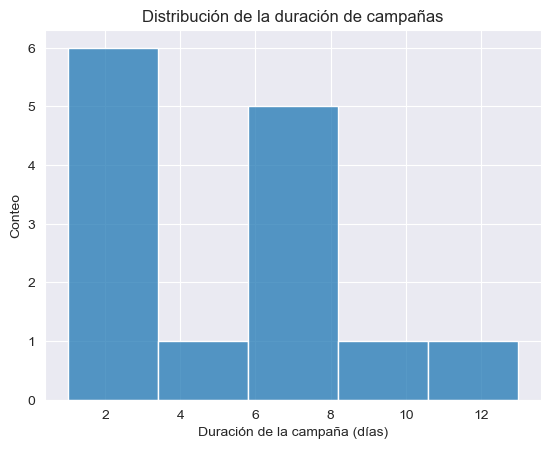

In [54]:
# Distribución gráfica de la duaración de las camapañas 
sns.set_style('darkgrid')
sns.histplot(data = ab_project_marketing_data, x = 'duration', bins = 5)
plt.title('Distribución de la duración de campañas')
plt.xlabel('Duración de la campaña (días)')
plt.ylabel('Conteo')
plt.show()

## Procesamiento y análisis del dataset final_ab_events_data

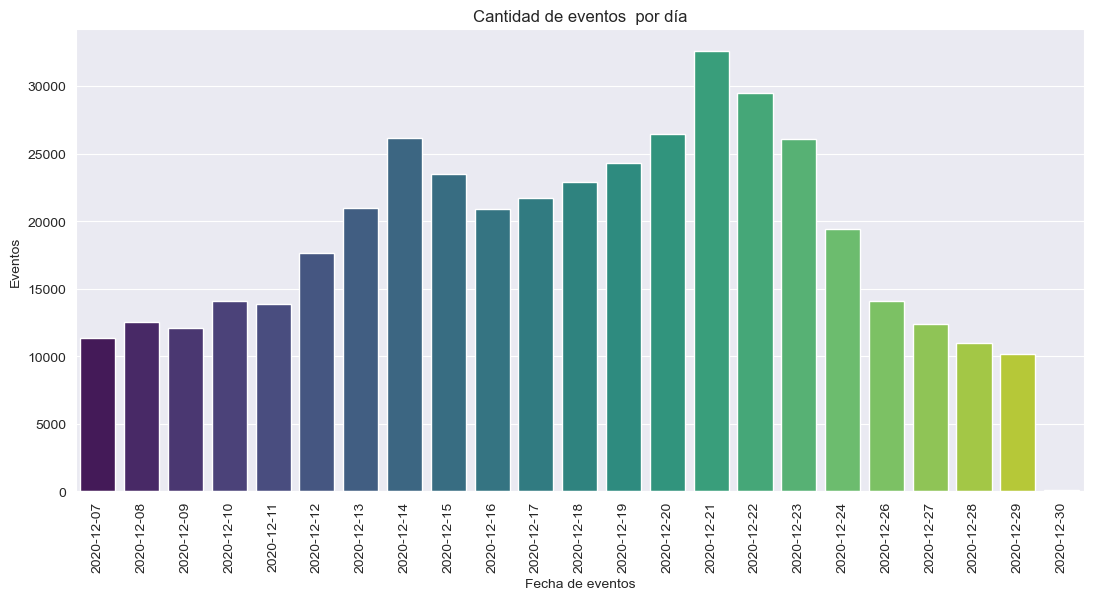

In [55]:
# Cantidad de eventos por día 
evets_per_day = final_ab_events_data.groupby('date').agg({'event_name':'count'}).reset_index().sort_values(by ='date')
evets_per_day.rename(columns={'event_name':'count'}, inplace=True)
plt.figure(figsize=(13,6))
sns.barplot(data=evets_per_day, x='date', y='count', palette='viridis', hue ='date', legend=False)
plt.title('Cantidad de eventos  por día')
plt.xlabel('Fecha de eventos')
plt.ylabel('Eventos')
plt.xticks(rotation=90)
plt.show()
# evets_per_day


Se observa que la mayor cantidad de eventos ocurrio en los día 14 y 23 de diciembre. También se aprecia que el día 21 se presentaron la mayor cantidad de eventos, seguido por el día 23 y después el día 14.

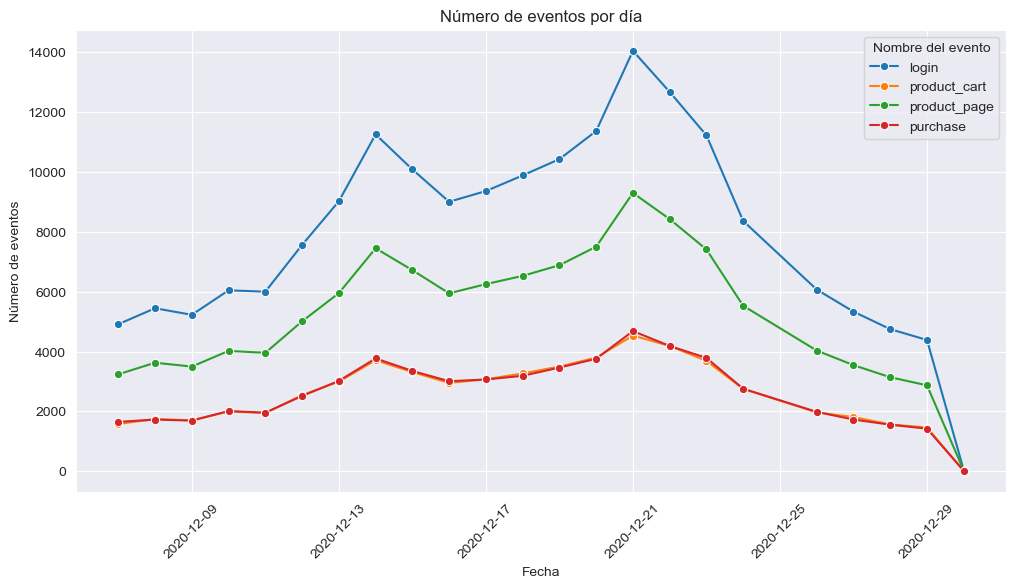

In [56]:
# Gráfico de línea con eventos por nombre y fecha 
events_per_day = final_ab_events_data.groupby(['date', 'event_name']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_per_day, x='date', y='count', hue='event_name', marker='o')

plt.title('Número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.legend(title='Nombre del evento')
plt.show()

* Se observan que los mayores eventos, son login -> product_page -> product_car / purchase. Lo que tambíen establece un orden lógico para el embudo de acciones. 
* Existen dos fechas en los que los valores marcan un notable incremento para los tres eventos, los días 14 y 21 de diciembre.

In [57]:
# Queda sin efecto, se relizó gráfica de línea

"""Eventos específicos por día 
for event in final_ab_events_data['event_name'].unique().tolist():
    events = final_ab_events_data.query("event_name == @event")
    events_date = events.groupby('date').agg({'event_name':'count'}).reset_index()
    events_date.rename(columns ={'event_name':'count'}, inplace = True)
    plt.figure(figsize=(13,6))
    sns.barplot(data=events_date, x='date', y='count', palette='viridis', hue ='date', legend=False)
    plt.title(f'Cantidad de eventos {event} por día')
    plt.xlabel('Fecha de eventos')
    plt.ylabel(event)
    plt.xticks(rotation=90)
    plt.show()"""
    



'Eventos específicos por día \nfor event in final_ab_events_data[\'event_name\'].unique().tolist():\n    events = final_ab_events_data.query("event_name == @event")\n    events_date = events.groupby(\'date\').agg({\'event_name\':\'count\'}).reset_index()\n    events_date.rename(columns ={\'event_name\':\'count\'}, inplace = True)\n    plt.figure(figsize=(13,6))\n    sns.barplot(data=events_date, x=\'date\', y=\'count\', palette=\'viridis\', hue =\'date\', legend=False)\n    plt.title(f\'Cantidad de eventos {event} por día\')\n    plt.xlabel(\'Fecha de eventos\')\n    plt.ylabel(event)\n    plt.xticks(rotation=90)\n    plt.show()'

In [58]:
# Cantidad de eventos promedio por usuario
event_per_user = final_ab_events_data.groupby('user_id').agg({'event_name':'count'}).reset_index()
event_per_user['event_name'].describe()

count    58703.000000
mean         7.218728
std          4.122609
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         36.000000
Name: event_name, dtype: float64

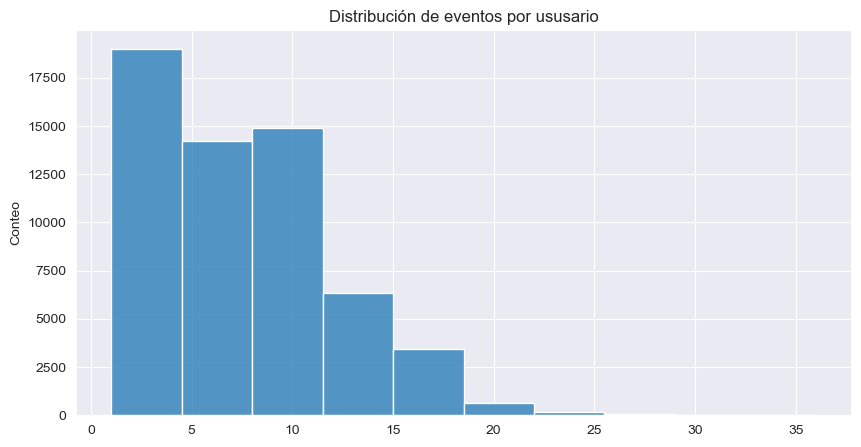

In [59]:
# Distribucón de eventos por usuario
plt.figure(figsize=(10,5))
sns.histplot(data=event_per_user, x='event_name',bins=10,)
plt.title("Distribución de eventos por ususario")
plt.xlabel('')
plt.ylabel('Conteo')
plt.show()

* Los usuarios tienen una media de 7 eventos, con un máxico de 36. El 75% de los usuarios tienen 9 eventos o menos. 
* Se observa que la distribución de eventos por usuario esta sesgada a la derecha. 

In [60]:
# Promedio de ventas
final_ab_events_data['details'].describe()

count    423761.000000
mean          3.399019
std          28.498201
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         499.990000
Name: details, dtype: float64

La venta promedio se situa en 3.39, siendo la desviación estándar de 28.49. La venta más alta se registr en 499.99


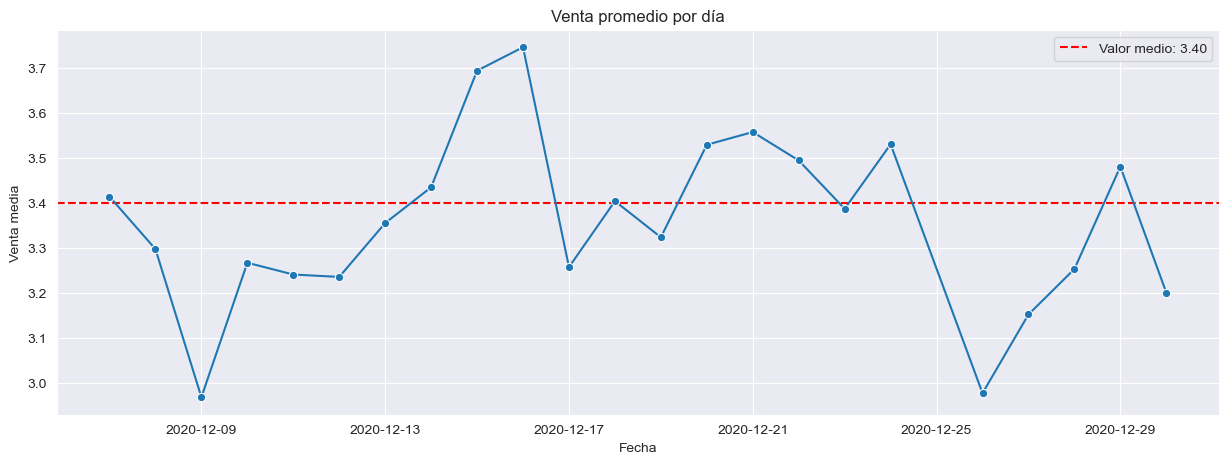

In [61]:
# Promedio de venta por día
mean_purchase = final_ab_events_data['details'].mean()

purchase_per_day = final_ab_events_data.groupby('date').agg({'details':'mean'}).reset_index()
plt.figure(figsize=(15,5))
plt.axhline(y=mean_purchase, color='red', linestyle='--', label=f'Valor medio: {mean_purchase:.2f}')
sns.lineplot(data=purchase_per_day, x='date', y='details', marker ='o')
plt.title('Venta promedio por día')

plt.xlabel('Fecha')
plt.ylabel('Venta media')

plt.show()

La media de ventas es de 3.40 y se aprecia en el gráfico que el día 16 de diciembre se tuvo la venta promedio más alta. También existen otras fechas con ventas por encima del promedio, así como fechas como el 9 y 26 que tienens las menores ventas promedio. 

In [62]:
# Embudo de eventos
events_funnel = final_ab_events_data.groupby('event_name').agg({'user_id':'nunique'}).reset_index()
events_funnel.rename(columns={'user_id':'n_users'}, inplace=True)

events_funnel.sort_values(by='n_users', ascending= False, inplace=True)

fig = go.Figure(go.Funnel(
    y = events_funnel['event_name'],
    x = events_funnel['n_users'],
    marker=dict(color=['royalblue', 'cornflowerblue', 'royalblue', 'cornflowerblue', 'royalblue'])
))
fig.update_layout(title='Embudo de usuarios por eventos')
fig.show()

El embudo de eventos indica que las fases por las que pasa un usuario son `login` -> `product_page` -> `purchase` y que opcionalmente puede pasar a `product_cart`. Esto podría deberse a que hay un botón de compra rápida, después de que se muestra la página del producto y al ser el producto que el cliente esta buscando decide comprarlo directamente sin pasar por la fase de product_cart, sin embargo esto se podría aplicar al 0.2% de los usuarios. 

Es importante mencionar que las promociones vigentes durante el mes de diciembre fueron `CIS New Year Gift Lottery` y 
`Christmas&New Year Promo`

In [63]:
# Filtrado de eventos por 

## Procesamiento y análisis del dataset final_ab_new_events_data

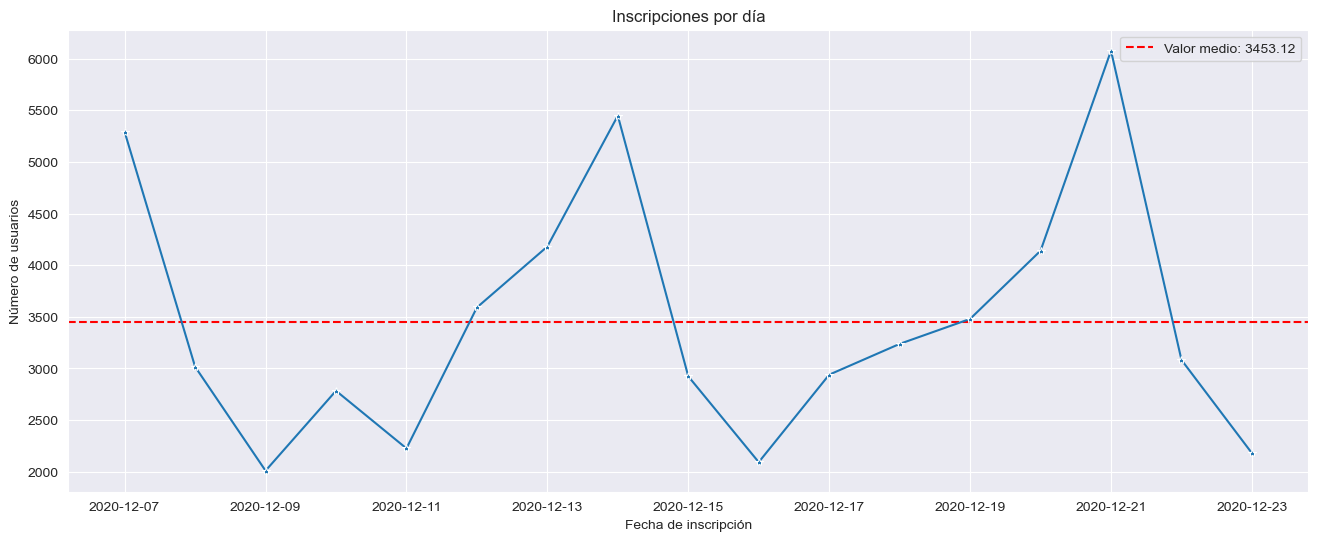

In [64]:
# Inscripciones por fecha (gráfico de línea)

new_events_date = final_ab_new_events_data.groupby('first_date').agg({'user_id':'count'}).reset_index()
new_events_mean = new_events_date['user_id'].mean()
plt.figure(figsize=(16,6))
plt.axhline(y=new_events_mean, color='red', linestyle='--', label=f'Valor medio: {new_events_mean:.2f}')
sns.lineplot(data = new_events_date, x ='first_date', y = 'user_id', marker ='*')
plt.title('Inscripciones por día')
plt.xlabel('Fecha de inscripción')
plt.ylabel('Número de usuarios')
plt.show()

In [65]:
# Calculo de incremento de inscripciones 
increase = 100 - (new_events_date.iloc[7]['user_id'] / new_events_date.iloc[14]['user_id']*100)
increase

10.350501892381118

En la figura anterior se observan dos incrementos en la inscripción e usuarios en las fechas 14 y 21 de diciembre de un 10.35%. Las fechas previas al incremento de las inscripciones son el 11 y el 16 de diciembre.

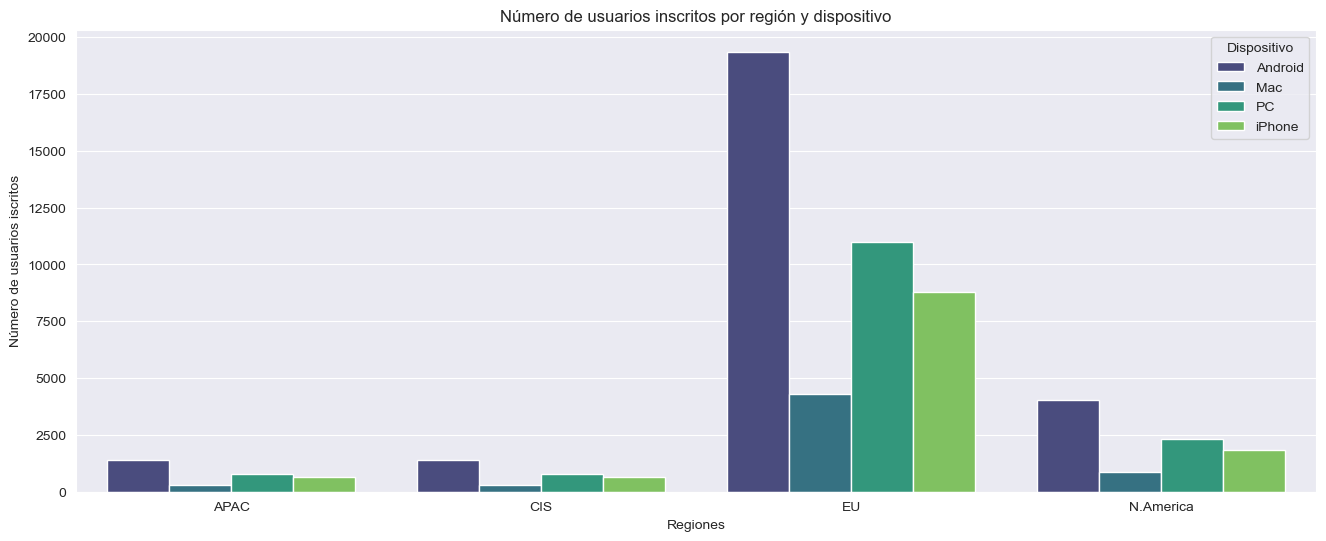

In [66]:
# Inscripción por región y por dispositivo 
#final_ab_new_events_pivot = final_ab_new_events_data.pivot_table(index ='region', columns='device', values ='user_id', aggfunc='count')
final_ab_new_events_group = final_ab_new_events_data.groupby(['region', 'device']).agg({'user_id':'count'}).reset_index()
final_ab_new_events_group.rename(columns={'device':'Dispositivo'}, inplace= True)
plt.figure(figsize=(16,6))
sns.barplot(data=final_ab_new_events_group, x='region', y='user_id', hue='Dispositivo', palette='viridis')
plt.title('Número de usuarios inscritos por región y dispositivo')
plt.xlabel('Regiones')
plt.ylabel('Número de usuarios iscritos')
plt.show()

En la figura anterior se observa que la región con más usuarios inscritos es `EU`, seguida por `N.America`. También se observa que la mayoría de los usuarios se inscriben desde dispositivos `Android` seguido de `PC` y `Iphone`. 

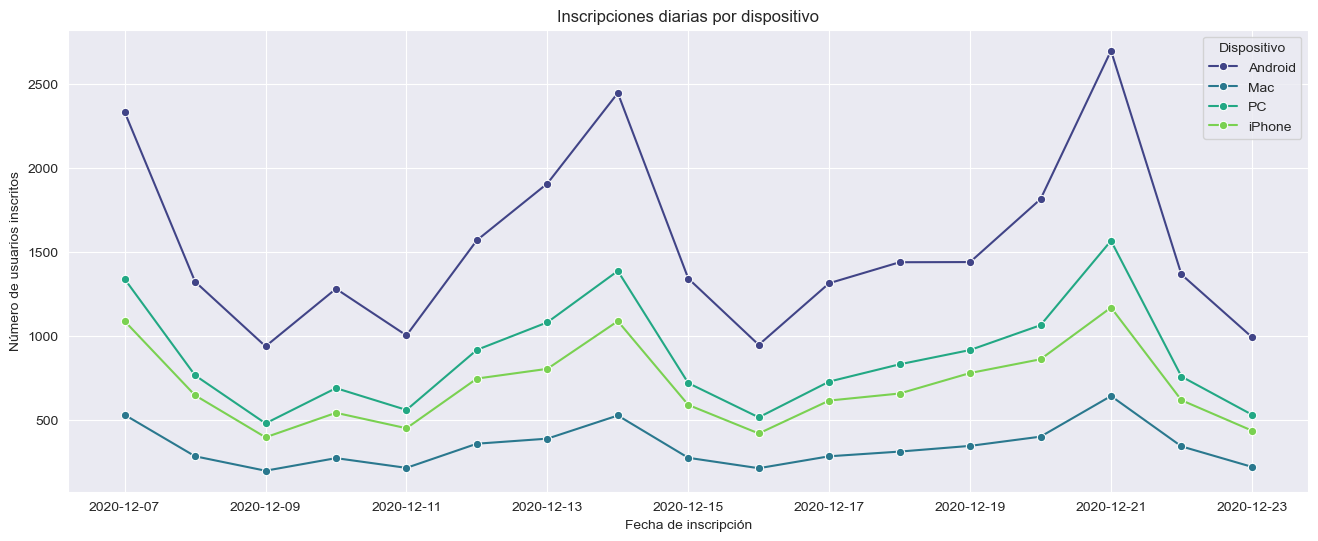

In [67]:
# Comportamiento de inscripción por fecha y dispoivito (gráfico de línea)

final_ab_new_by_date =  final_ab_new_events_data.groupby(['first_date', 'device']).size().reset_index(name='count')
final_ab_new_by_date.rename(columns={'device':'Dispositivo'}, inplace= True)
plt.figure(figsize=(16,6))
sns.lineplot(data=final_ab_new_by_date, x ='first_date', y='count', hue ='Dispositivo', marker ='o', palette='viridis')
plt.title('Inscripciones diarias por dispositivo')
plt.xlabel('Fecha de inscripción')
plt.ylabel('Número de usuarios inscritos')
plt.show()


Como en los anteriores casos, al revisar por fechas la inscripción se observan unos máximos en las fechas 14 y 21 de diciembre para todos los dispositivos.

## Procesamiento y análisis del dataset final_ab_participants_data

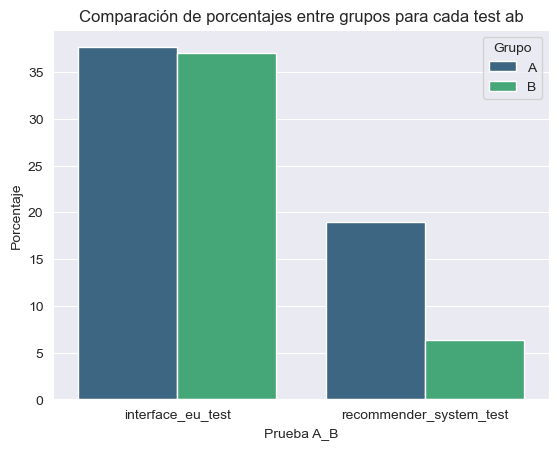

In [68]:
# Número de participantes por grupo y por ab_test en porcentaje
final_ab_by_group_test = final_ab_participants_data.groupby(['ab_test', 'group']).size().reset_index(name='count')
final_ab_by_group_test.rename(columns={'group':'Grupo'}, inplace= True)
final_ab_by_group_test['percentage'] = (final_ab_by_group_test['count'] / final_ab_by_group_test['count'].sum()) * 100
sns.barplot(data=final_ab_by_group_test, x='ab_test', y ='percentage', hue='Grupo', palette='viridis')
plt.title('Comparación de porcentajes entre grupos para cada test ab')
plt.xlabel('Prueba A_B')
plt.ylabel('Porcentaje')
plt.show()

En la figura se oberva que los porcentajes de los grupos de la prueba `interface_eu_test` son similares, mientras que los porcentajes de participantes para la prueba `recommender_system_tes` tienen una diferencia del 10% aproximadamente lo que podría generar un problema al realizar una prueba a_b con `recommender_system_tes` ya que los datos estarían sesgados.

# Segmentación de datos para realizar test A/B

Se requieren los datos que cumplan con las siguientes condiciones:
* Usuarios que se hayan inscrito entre 7 (inicio de la prueba) y hasta el 21 de diciembre (fecha en la cerraron los registros). 
* Que pertenezcan a la región de UE
* Valor de la columna 'ab_test' = "recommender_system_test"
* Nombre del evento por usuario.
* El tiempo desde la inscripción del usuario hasta fecha de eventos este dentro de 14 días. 
* El orden de la conversión se considera `login` --> `product_page` --> `product_cart` --> `purchase`

In [69]:
# Celda queda sin efecto, se enfocará en trabjo individual de datasets para una integración final. 

# Generación de dataset de trabajo con las columnas requeridas

wdataset1 = pd.merge(final_ab_participants_data, final_ab_new_events_data, on='user_id', how = 'inner')
wdataset2 = pd.merge(wdataset1, final_ab_events_data, on = 'user_id', how = 'inner')
wdataset2.rename(columns={'date':'event_date'}, inplace = True)

# Generación de columna con día del evento 
wdataset2

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,event_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,login,0.00,2020-12-07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,0.00,2020-12-20
...,...,...,...,...,...,...,...,...,...,...
102833,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-23 13:03:17,login,0.00,2020-12-23
102834,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14 19:12:49,login,0.00,2020-12-14
102835,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-15 01:50:22,login,0.00,2020-12-15
102836,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-16 19:27:36,login,0.00,2020-12-16


Data set de trabajo contiene los grupos, ab_test, fecha de inscripción, región, dispositivo, fecha del evento, nombre del evento, y detalles 

Data set contiene 102,833 registros.

In [70]:
# Filtro de datos por ab_test
data_filtered_abtest = wdataset2.query("ab_test == 'recommender_system_test'")

# Filtrado de datos por fecha de inscripción (1 - 21 diciembre)
data_filtered_date = data_filtered_abtest[(data_filtered_abtest['first_date'] >= '2020-12-07' ) & (data_filtered_abtest['first_date'] <= '2020-12-21')]

# Filtrado de datos por region

data_filtered_region = data_filtered_date[(data_filtered_date['region']== 'EU')]
data_filtered_region

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,event_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,login,0.00,2020-12-07
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,0.00,2020-12-20
...,...,...,...,...,...,...,...,...,...,...
22669,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,0.00,2020-12-15
22670,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,0.00,2020-12-20
22671,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,0.00,2020-12-14
22672,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,0.00,2020-12-15


In [72]:
data_filtered_region['group'].value_counts()

group
A    17670
B     5004
Name: count, dtype: int64

In [78]:
data_filtered_region.query("user_id == 'D1ABA3E2887B6A73'")[['event_name', 'event_dt']].sort_values(by='event_dt')

,event_name,event_dt
0,purchase,2020-12-07 14:43:27
2,product_page,2020-12-07 14:43:27
3,login,2020-12-07 14:43:27
1,product_cart,2020-12-07 14:43:29


In [79]:
data_filtered_region.query("user_id == '80712ED4EA1B52A5'")[['event_name', 'event_dt']].sort_values(by='event_dt')

,event_name,event_dt
22665,product_cart,2020-12-14 05:48:50
22671,login,2020-12-14 05:48:50
22668,product_page,2020-12-14 05:48:51
22672,login,2020-12-15 20:10:03
22666,product_cart,2020-12-15 20:10:05
22669,product_page,2020-12-15 20:10:06
22673,login,2020-12-20 20:01:32
22667,product_cart,2020-12-20 20:01:34
22670,product_page,2020-12-20 20:01:34


Después del filtrado de datos para se obtiene 

Filtrar utilizado los tiempos de los eventos para cada usuario. El embudo indica un orden de tiempo para marcar la conversión, revisar si se puede cumplir. 